# Система распознавания спама в рассылках.

Чтобы воспользоваться данной программой, внимательно читайте все аннотации к строкам кода.

Для запуска ячеек кода в интерактивном блокноте используйте:

1. Кнопку (▶Run) на верхней панели;
2. Сочитание клавиш Shift+Enter.

Используя интерактивный блокнот вы сможете увидеть полную реализацию программы и подметитить некоторые важные моменты для себя.

Удачи в использовании нашей программы ;)

Подробная инструкция по установке программы находится по ссылке:<br>
https://github.com/awilliamson1889/Python-DS-Learning

<b>Первый шаг который необходимо сделать запустить ячейку ниже для подключения всех необходимых библиотек.</b>

In [5]:
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from src.reader import DSReader
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

ё
try:
    nltk.find("stopwords")
except LookupError:
    nltk.download("stopwords")
    
try:
    nltk.find("punkt")
except LookupError:
    nltk.download('punkt')
    
print('Библиотеки успешно подключены !')

Библиотеки успешно подключены !


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Masquerade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Masquerade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Набор данных является важной частью машинного обучения, от качества набора данных сильно зависит процесс обучения модели.

<b>Запустите ячейку ниже для загрузки набора данных.</b>

In [6]:
url1 = 'raw.githubusercontent.com/awilliamson1889/Python-DS-Learning/experiment/tests/datasets/emails.csv'
url2 = 'raw.githubusercontent.com/awilliamson1889/Python-DS-Learning/experiment/tests/datasets/spam_ham_dataset.csv'

dataset_path = os.path.abspath("./tests/datasets/emails.csv")
test_dataset_path = os.path.abspath("./tests/datasets/spam_ham_dataset.csv")

try:
    emails_data = DSReader(dataset_path)
except FileNotFoundError:
    print("Dataset not found.\nDownloading dataset from: ", url1)
    emails_data = DSReader(url1)
    
try:
    emails_test_data = DSReader(test_dataset_path)
except FileNotFoundError:
    print("Dataset not found.\nDownloading dataset from: ", url2)
    emails_test_data = DSReader(url2)
    
print('Наборы данных успешно загружены !')

Наборы данных успешно загружены !


Как говорилось ранее - качество набора данных сильно влияет на процесс обучения модели.

Для улучшения качества набора данных он проходит этап очистки.

Этапы очистки набора данных:
1. Приведение всего набора данных к нижнему регистру;
2. Удаление чисел из набора данных (писем);
3. Удаление знаков пунктуации из набора данных (писем);
4. Удаление повторяющихся данных;
5. Удаление стоп-слов (the, is, a and etc).

<b>Запустите ячейку ниже для очистки набора данных.</b>

In [7]:
def data_set_cleaning(obj):
    obj.to_lower()
    obj.remove_digits()
    obj.remove_punctuation_marks()
    obj.remove_duplicates()
    obj.remove_stopwords()
    
data_set_cleaning(emails_data)
data_set_cleaning(emails_test_data)

X_train, y_train = emails_data.vectorize()
X_test, y_test = emails_test_data.vectorize()

print('Данные успешно очищены !')

Данные успешно очищены !


После подготовки набора данных можно приступить к процессу обучения модели.

<b>Запустите ячейку ниже для обучения модели.</b>

In [8]:
pipeline_SGDClassifier2 = Pipeline([('vect', CountVectorizer()),
                                    ('tfidf', TfidfTransformer()),
                                    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                                          alpha=1e-3, random_state=1))])

pipeline_SGDClassifier2.fit(X_train.ravel(), y_train)

print('Обучение модели прошло успешно!\nМодель готова к использованию.')

Обучение модели прошло успешно!
Модель готова к использованию.


После успешного обучения модели происходит этап оценки точности модели.

<b>Запустите ячейку ниже и посмотрите на оценочные метрики модели и матрицу неточностей!</b>

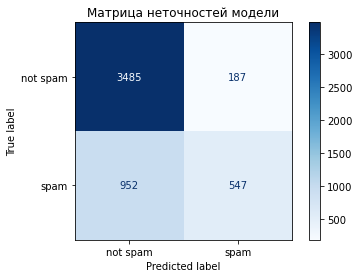

Оценочные метрики модели:
Recall = 0.7854406130268199
Precision = 0.9490740740740741
F-measure = 0.859538784067086


In [25]:
class_names = ['not spam', 'spam']

titles_options = [("Матрица неточностей модели", None, pipeline_SGDClassifier2)]

for title, normalize, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, X_test.ravel(), y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)

    matrix = disp.confusion_matrix

    TP, FP, FN, TN = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]

    disp.ax_.set_title(title)

    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f_measure = 2 * recall * precision / (precision + recall)

    plt.show()
    
print(f'Оценочные метрики модели:\nRecall = {recall}\nPrecision = {precision}\nF-measure = {f_measure}')

Можно заметить что наша модель довольно таки хорошо определяет наличие СПАМА в рассылке.

Наконецто мы можем вводить наши данные и получать предсказания модели.

<b>Запустите ячейку ниже и попробуйте передать моделе текст письма (на английском языке).</b>

In [2]:
email_text = input('Пожалуйста введите текст сообщения:\n')

df_email = pd.DataFrame({'email': [email_text],
                         'label': '?'})
                        
df_email.to_csv(path_or_buf='user.csv', index=False)
                        
dataset_path = os.path.abspath("user.csv")

emails_user = DSReader(dataset_path)
                        
data_set_cleaning(emails_user)

predict = pipeline_SGDClassifier2.predict(emails_user.dataset['email'])

print("\nЯ думаю что это письмо СПАМ!" if predict == [1] else "Я думаю это письмо НЕ СПАМ." )

Пожалуйста введите текст сообщения:
Привет меня зовут Андрей!


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Masquerade\anaconda3\lib\logging\__init__.py", line 1084, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\Masquerade\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 95-100: character maps to <undefined>
Call stack:
  File "C:\Users\Masquerade\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Masquerade\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Masquerade\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Masquerade\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Masquerade\anaconda3\lib\s

NameError: name 'data_set_cleaning' is not defined

Точность нашей модели не очень велика и составляет всего 77% однако, данный показатель можно увеличить в будущем улучшив качество набора данных.

<b>Спасибо за использование нашей программы!</b> 

import os
import nltk
import matplotlib.pyplot as plt
from src.reader import DSReader
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

nltk.download('punkt')

try:
    nltk.find("stopwords")
except LookupError:
    nltk.download("stopwords")


def data_set_cleaning(obj):
    obj.to_lower()
    obj.remove_digits()
    obj.remove_punctuation_marks()
    obj.remove_duplicates()
    obj.remove_stopwords()

url = "raw.githubusercontent.com/awilliamson1889/Python-DS-Learning/email-clf-model/tests/datasets/emails.csv"
dataset_path = os.path.abspath("./tests/datasets/emails.csv")
test_dataset_path = os.path.abspath("./tests/datasets/spam_ham_dataset.csv")

test_data = DSReader(test_dataset_path)

try:
    emails_data = DSReader(dataset_path)
except FileNotFoundError:
    print("Dataset not found.\nDownloading dataset from: ", url)
    emails_data = DSReader(url)

data_set_cleaning(emails_data)
data_set_cleaning(test_data)

X_train, y_train = emails_data.vectorize()
X_test, y_test = test_data.vectorize()

pipeline_SGDClassifier2 = Pipeline([('vect', CountVectorizer()),
                                    ('tfidf', TfidfTransformer()),
                                    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                                          alpha=1e-3, random_state=1))])

pipeline_SGDClassifier2.fit(X_train.ravel(), y_train)

print('Fit process successful ending!')

answers = pipeline_SGDClassifier2.predict(X_test.ravel())

print(pipeline_SGDClassifier2.score(X_test.ravel(), y_test))


class_names = ['not spam', 'spam']

titles_options = [("Confusion matrix pipeline_SGDClassifier", None, pipeline_SGDClassifier2)]

for title, normalize, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, X_test.ravel(), y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)

    matrix = disp.confusion_matrix

    TP, FP, FN, TN = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]

    disp.ax_.set_title(title)

    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f_measure = 2 * recall * precision / (precision + recall)

    plt.savefig('model_confusion_matrix.png', dpi=120)

with open('metrics.txt', 'w') as outfile:
    outfile.write(f'Recall = {recall}\nPrecision = {precision}\nF-measure = {f_measure}')

